In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pymongo
from pymongo import MongoClient

In [3]:
connection=MongoClient('localhost',27017)
db=connection.sai

In [4]:
movie_data=db.final_movie_data

In [5]:
dataset=pd.DataFrame(list(movie_data.find()))

In [6]:
data=pd.DataFrame(dataset)
#credits.drop(["_id"], inplace = True)
data

,_id,index,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,60199d525c4f52a1de9a2aa7,0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,60199d525c4f52a1de9a2aa8,1,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker Doug Walker Documentary
2,60199d525c4f52a1de9a2aa9,2,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andr...
3,60199d525c4f52a1de9a2aaa,3,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan G...
4,60199d525c4f52a1de9a2aab,4,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...
...,...,...,...,...,...,...,...,...,...
6063,60199d525c4f52a1de9a4256,6063,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Comedy Drama Music Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter ...
6064,60199d525c4f52a1de9a4257,6064,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
6065,60199d525c4f52a1de9a4258,6065,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
6066,60199d525c4f52a1de9a4259,6066,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


In [7]:
#data = pd.read_csv('F:\data_2020.csv')
#data.head()

In [8]:
#data.head()

In [9]:
## clean genres--- remove | between generes
#data['genres'] = data['genres'].apply(lambda a: str(a).replace('|', ' '))
data['genres']

0                         Action Adventure Fantasy Sci-Fi
1                                             Documentary
2                                 Action Adventure Sci-Fi
3       Adventure Animation Comedy Family Fantasy Musi...
4                                 Action Adventure Sci-Fi
                              ...                        
6063                 Animation Comedy Drama Music Fantasy
6064                                Action Fantasy Family
6065                                                Drama
6066                                 Thriller Crime Drama
6067                                                Drama
Name: genres, Length: 6068, dtype: object

In [10]:
data['movie_title'][0]

'avatar'

In [11]:
#data['movie_title'] = data['movie_title'].apply(lambda a:a[:-1])
data['movie_title'][0]

'avatar'

In [12]:
data.head()

,_id,index,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,60199d525c4f52a1de9a2aa7,0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,60199d525c4f52a1de9a2aa8,1,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker Doug Walker Documentary
2,60199d525c4f52a1de9a2aa9,2,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andr...
3,60199d525c4f52a1de9a2aaa,3,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan G...
4,60199d525c4f52a1de9a2aab,4,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...


### vectorizing and then calculating cosine sim

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
vec = CountVectorizer()
vec_matrix = vec.fit_transform(data['comb'].values.astype('U'))

In [15]:
similarity = cosine_similarity(vec_matrix)
print(similarity)

[[1.         0.         0.3086067  ... 0.         0.         0.        ]
 [0.         1.         0.2236068  ... 0.         0.         0.        ]
 [0.3086067  0.2236068  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.09534626 0.10540926]
 [0.         0.         0.         ... 0.09534626 1.         0.10050378]
 [0.         0.         0.         ... 0.10540926 0.10050378 1.        ]]


In [16]:
def recommend(movie):
    if movie not in data['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = data.loc[data['movie_title']==movie].index[0]
        lst = list(enumerate(similarity[i]))
        #print(lst)
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        print(lst)
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            print(a)
            l.append(data['movie_title'][a])
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('similar movies to---> '+movie)
        plt.ylabel('cosine scores')
        return l

[(5381, 0.38461538461538464), (5747, 0.38461538461538464), (5996, 0.38461538461538464), (5497, 0.35805743701971643), (5544, 0.35805743701971643), (5464, 0.3344968040028363), (5483, 0.3202563076101743), (5523, 0.3202563076101743), (5548, 0.3202563076101743), (5858, 0.3202563076101743)]
5381
5747
5996
5497
5544
5464
5483
5523
5548
5858


['the cloverfield paradox',
 'bloodline',
 'love and monsters',
 'the first purge',
 'the predator',
 'revenge',
 'hotel artemis',
 'the meg',
 'lizzie',
 'the invisible man']

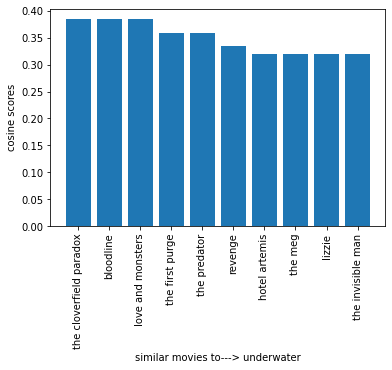

In [17]:
recommend('underwater')

In [18]:
#in place of a change it to 171
data['movie_title'][171]

'bad boys ii'

In [19]:
data['movie_title'].sample(10)

2049               the bachelor
2960             september dawn
1126            the sixth sense
1339             the blind side
299                the campaign
5720                  good boys
5552                life itself
5341     the girl from the song
3866            day of the dead
41      star trek into darkness
Name: movie_title, dtype: object

In [20]:
recommend('The Kids Are All Right')

'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'

In [21]:
recommend('The Dark Knight Rises')

'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'

[(5381, 0.38461538461538464), (5747, 0.38461538461538464), (5996, 0.38461538461538464), (5497, 0.35805743701971643), (5544, 0.35805743701971643), (5464, 0.3344968040028363), (5483, 0.3202563076101743), (5523, 0.3202563076101743), (5548, 0.3202563076101743), (5858, 0.3202563076101743)]
5381
5747
5996
5497
5544
5464
5483
5523
5548
5858


['the cloverfield paradox',
 'bloodline',
 'love and monsters',
 'the first purge',
 'the predator',
 'revenge',
 'hotel artemis',
 'the meg',
 'lizzie',
 'the invisible man']

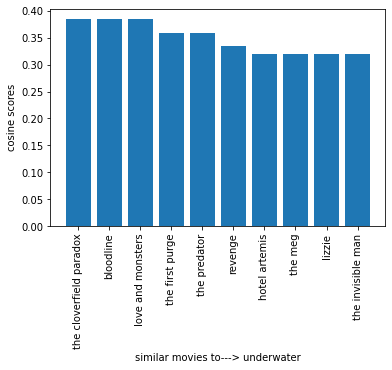

In [22]:
recommend('underwater')

[(1059, 0.6), (1464, 0.4), (2431, 0.4), (2640, 0.4), (2686, 0.4), (2935, 0.4), (3346, 0.4), (3544, 0.38138503569823695), (2126, 0.3508232077228117), (3645, 0.3508232077228117)]
1059
1464
2431
2640
2686
2935
3346
3544
2126
3645


['revolutionary road',
 'the reader',
 'sense and sensibility',
 'romeo + juliet',
 'little children',
 "what's eating gilbert grape",
 'the great gatsby',
 'iris',
 'eternal sunshine of the spotless mind',
 'heavenly creatures']

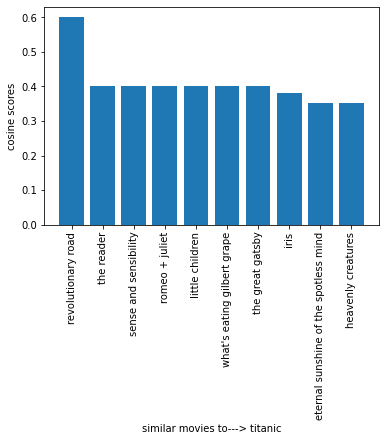

In [32]:
recommend('titanic')

In [23]:
import pickle
# load the nlp model and tfidf vectorizer from disk
filename = 'nlp_model.pkl'
clf = pickle.load(open(filename, 'rb'))
vectorizer = pickle.load(open('tranform.pkl','rb'))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [25]:
v = TfidfVectorizer()
tfidf_des = v.fit_transform(data['comb'].values.astype('U'))

In [26]:
Euc_Dis = euclidean_distances(tfidf_des)
#Euc_D = euclidean_distances(vec_matrix)

In [27]:
def recommend_eucledian(movie):
    if movie not in data['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = data.loc[data['movie_title']==movie].index[0]
        lst = list(enumerate(Euc_Dis[i]))
        #print(lst)
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[0:11] # excluding first item since it is the requested movie itself
        print(lst)
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            print(a)
            l.append(data['movie_title'][a])
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('similar movies to---> '+movie)
        plt.ylabel('eucledian scores')
        return l

[(22, 1.4142135623730951), (30, 1.4142135623730951), (42, 1.4142135623730951), (48, 1.4142135623730951), (50, 1.4142135623730951), (53, 1.4142135623730951), (65, 1.4142135623730951), (69, 1.4142135623730951), (79, 1.4142135623730951), (82, 1.4142135623730951), (85, 1.4142135623730951)]
22
30
42
48
50
53
65
69
79
82
85


['the golden compass',
 'monsters university',
 'jack the giant slayer',
 'brave',
 'wall·e',
 'a christmas carol',
 'evan almighty',
 'inside out',
 'the polar express',
 'how to train your dragon',
 'interstellar']

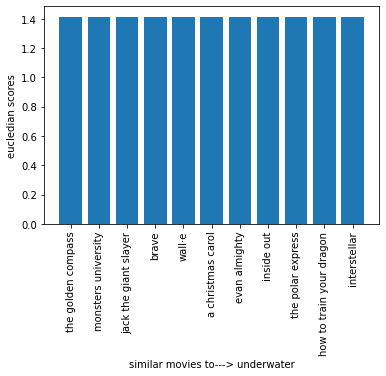

In [28]:
recommend_eucledian('underwater')

### using tf-idf vectorizer instead of count vectorizer

In [29]:
xsimilarity = cosine_similarity(tfidf_des)

In [30]:
def recommend_c(movie):
    if movie not in data['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = data.loc[data['movie_title']==movie].index[0]
        lst = list(enumerate(xsimilarity[i]))
        #print(lst)
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        print(lst)
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            print(a)
            l.append(data['movie_title'][a])
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('similar movies to---> '+movie)
        plt.ylabel('cosine scores')
        return l

[(5996, 0.38442796754691616), (2153, 0.24445792598669513), (4854, 0.23196073119958346), (2502, 0.22991237420619381), (5548, 0.22669607752967608), (5946, 0.2170996029352708), (5417, 0.20293565520761886), (71, 0.20106925811135745), (391, 0.1978462557198132), (1747, 0.1967801307151153)]
5996
2153
4854
2502
5548
5946
5417
71
391
1747


['love and monsters',
 'into the wild',
 'the signal',
 'the yellow handkerchief',
 'lizzie',
 'bill & ted face the music',
 '7 days in entebbe',
 'snow white and the huntsman',
 'jumper',
 'what just happened']

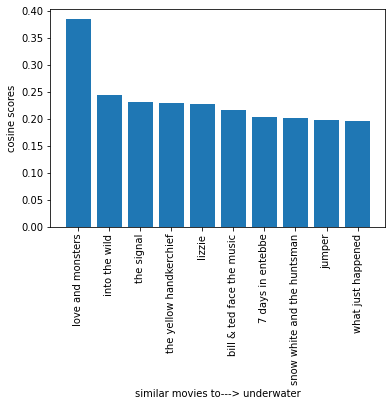

In [31]:
recommend_c('underwater')